# Group 12
### Members:
- DIZON, GAVIN RAINE R.
- PALMARES, ALYSSA JAYE L.
- TEE, GIANCARLO T.

## An Overview

The group would be working on a K-means clustering model for the Five Big Personality traits dataset. To give a brief overview of our task, the goal is to cluster the dataset based on the personality traits in the Big Five Personality Model or the Five-Factor model. The Big Five Personality Model or the Five-Factor Model is used for grouping or clustering people based on personality traits. The model uses common descriptors of common languages. This test is mainly used for career assessment since this gives people more insight in how they react in different situations. In addition, this test uses the Big-Five Factor Markers from the International Personality Item Pool, developed by Goldberg. These are commonly used to describe the human personality and psyche.

## OCEAN or Five Factor Makers

1. **Extraversion (or Extroversion)** which can be identified as someone who gets motivated or energized in the company of others.

2. **Emotional Stability or Neuroticism** is a physical and emotional response to stress and perceived threats in someone’s daily life. This is mostly characterized by sadness or moodiness.
3. **Agreeableness** - these people tend to have high or prosocial behaviors. Moreover, People who exhibit high agreeableness will show signs of trust, altruism, kindness, and affection
4. **Conscientiousness** - includes having high levels of thoughtfulness, good impulse control, and goal-directed behaviors
5. **Openness** - These people are eager to learn and experience new things. They are imaginative and insightful.


### Importing needed libraries

In [1]:
#import sys
#!{sys.executable} -m pip install yellowbrick

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from yellowbrick.cluster import KElbowVisualizer
from sklearn.mixture import GaussianMixture
from sklearn.metrics import (silhouette_score, calinski_harabasz_score, davies_bouldin_score)
np.random.seed(0)

## Initializing Functions to be used later

In [3]:
# For visualization
def vis_questions(groupname, questions, color):
    plt.figure(figsize=(15,35))
    for i in range(1, 11):
        plt.subplot(10,3,i)
        plt.hist(data[groupname[i-1]], bins=14, color= color, alpha=.5)
        plt.title(questions[groupname[i-1]], fontsize=14)

def compare_two_graphs(groupname, questions, arr1, arr2 , grp1_name, grp2_name):
    plt.figure(figsize=(15, 35))
    labels = ["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Population"]    
    for i in range(0, len(arr1)):
        plt.subplot(10, 3, i+1)
        height = np.append(arr1[i], arr2[i])
        plt.bar(labels, height=height, color=["blue","blue","blue","blue", "blue", "green"], width = 0.4)
        plt.title(questions[groupname[i-1]], fontsize=14)

## Explaining, Loading, and Preprocessing Data

The data was collected through an online interactive personality test from 2016-2018. This survey was made by the International Personality Item Pool (IPIP). Participants were informed and asked for consent that the data will be recorded and used for research. 

In total, there are `50` questions wherein 10 of which are allotted to a specific factor maker. In the dataset, the questions were labeld as follows:

<body>
<style> 
table td, table th, table tr {text-align:left !important;}
</style>

<table style="text-align: left; float:left;">
    <tr>
        <th>Extroversion</th>
        <th>Emotional Stability</th>
        <th>Agreeableness</th>
        <th>Conscientiousness</th>
        <th>Openness</th>
    </tr>
    <tr>
        <td><b>EXT1</b> I am the life of the party.</td>
        <td><b>EST1</b> I get stressed out easily.</td>
        <td><b>AGR1</b> I feel little concern for others.</td>
        <td><b>CSN1</b> I am always prepared.</td>
        <td><b>OPN1</b> I have a rich vocabulary.</td>
    </tr>
    <tr>
        <td><b>EXT2</b> I don't talk a lot.</td>
        <td><b>EST2</b> I am relaxed most of the time.</td>
        <td><b>AGR2</b> I am interested in people.</td>
        <td><b>CSN2</b> I leave my belongings around.</td>
        <td><b>OPN2</b> I have difficulty understanding abstract ideas.</td>
    </tr>
    <tr>
        <td><b>EXT2</b> I don't talk a lot.</td>
        <td><b>EST2</b> I am relaxed most of the time.</td>
        <td><b>AGR2</b> I am interested in people.</td>
        <td><b>CSN2</b> I leave my belongings around.</td>
        <td><b>OPN2</b> I have difficulty understanding abstract ideas.</td>
    </tr>
    <tr>
        <td><b>EXT3</b> I feel comfortable around people.</td>
        <td><b>EST3</b> I worry about things.</td>
        <td><b>AGR3</b> I insult people.</td>
        <td><b>CSN3</b> I pay attention to details.</td>
        <td><b>OPN3</b> I have a vivid imagination.</td>
    </tr>
    <tr>
        <td><b>EXT4</b> I keep in the background.</td>
        <td><b>EST4</b> I seldom feel blue.</td>
        <td><b>AGR4</b> I sympathize with others' feelings.</td>
        <td><b>CSN4</b> I make a mess of things.</td>
        <td><b>OPN4</b> I am not interested in abstract ideas.</td>
    </tr>
    <tr>
        <td><b>EXT5</b> I start conversations.</td>
        <td><b>EST5</b> I am easily disturbed.</td>
        <td><b>AGR5</b> I am not interested in other people's problems.</td>
        <td><b>CSN5</b> I get chores done right away.</td>
        <td><b>OPN5</b> I have excellent ideas.</td>
    </tr>
    <tr>
        <td><b>EXT6</b> I have little to say.</td>
        <td><b>EST6</b> I get upset easily.</td>
        <td><b>AGR6</b> I have a soft heart.</td>
        <td><b>CSN6</b> I often forget to put things back in their proper place.</td>
        <td><b>OPN6</b> I do not have a good imagination.</td>
    </tr>
    <tr>
        <td><b>EXT7</b> I talk to a lot of different people at parties.</td>
        <td><b>EST7</b> I change my mood a lot.</td>
        <td><b>AGR7</b> I am not really interested in others.</td>
        <td><b>CSN7</b> I like order.</td>
        <td><b>OPN7</b> I am quick to understand things.</td>
    </tr>
    <tr>
        <td><b>EXT8</b> I don't like to draw attention to myself.</td>
        <td><b>EST8</b> I have frequent mood swings.</td>
        <td><b>AGR8</b> I take time out for others.</td>
        <td><b>CSN8</b> I shirk my duties.</td>
        <td><b>OPN8</b> I use difficult words.</td>
    </tr>
    <tr>
        <td><b>EXT9</b> I don't mind being the center of attention.</td>
        <td><b>EST9</b> I get irritated easily.</td>
        <td><b>AGR9</b> I feel others' emotions.</td>
        <td><b>CSN9</b> I follow a schedule.</td>
        <td><b>OPN9</b> I spend time reflecting on things.</td>
    </tr>
    <tr>
        <td><b>EXT10</b> I am quiet around strangers.</td>
        <td><b>EST10</b> I often feel blue.</td>
        <td><b>AGR10</b> I make people feel at ease.</td>
        <td><b>CSN10</b> I am exacting in my work.</td>
        <td><b>OPN10</b> I am full of ideas.</td>
    </tr>
</table>   
</body>

Another columns present in the given dataset are the `country` where the survey was answered, `IPC` or the number of users that share the same IP address when taking the test, and the screen size used when taking the test. There are also columns which measures the time they spent on a single question, the start page, and the end page.

### Removing Unused Columns and Rows with Missing Data

Since the only valid data from the dataset are the tables related to the survey such as columns containing Personality related questions like  (EXT, EST , AGR, CSN, and OPN) and the IPC, the other unrelated columns are truncated. The rows with missing values are also dropped.

In [4]:
data = pd.read_csv('data/data-final.csv', sep='\t')
pd.options.display.max_columns = 150

# drop unused columns
data.drop(data.columns[50:], axis=1, inplace=True)

print('How many missing values? ', data.isnull().values.sum())
# drop any rows with missing values.
data.dropna(inplace=True)
print('Number of participants: ', len(data))
data.head()

How many missing values?  89150
Number of participants:  1013558


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0


### Removing zeroes and zero-centering data
We then remove the zeros from the data as they signify that the person who answered skipped a question or multiple questions. We also zero-center the data to better visualize the respondent's answers by subtracting their answer by 3, which means they are neutral according to the Likert scale. Strongly agree will now be represented as `2`, and strongly disagree is now `-2`. 

In [5]:
# dropping rows with zeros
data = data[(data != 0).all(1)]

# Subtract 3 pre-processing
data = data.apply(lambda x: x - 3)
print('Number of participants: ', len(data))
data.head()

Number of participants:  874434


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,1.0,-2.0,2.0,-1.0,2.0,-2.0,2.0,-1.0,1.0,-2.0,-2.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,2.0,-1.0,1.0,-1.0,0.0,-1.0,1.0,0.0,1.0,0.0,1.0,0.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,2.0,-2.0,1.0,-2.0,1.0,-2.0,2.0,0.0,1.0,2.0
1,0.0,2.0,0.0,1.0,0.0,0.0,-1.0,2.0,-2.0,2.0,-1.0,0.0,1.0,-2.0,0.0,-2.0,-1.0,-2.0,0.0,-2.0,-2.0,1.0,-2.0,2.0,-2.0,2.0,0.0,1.0,2.0,0.0,0.0,-1.0,2.0,0.0,0.0,-2.0,0.0,0.0,2.0,0.0,-2.0,-1.0,1.0,-1.0,0.0,-2.0,1.0,-1.0,2.0,0.0
2,-1.0,0.0,1.0,1.0,0.0,-1.0,-2.0,0.0,-1.0,2.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-2.0,0.0,-2.0,1.0,-2.0,1.0,-1.0,1.0,-2.0,1.0,1.0,0.0,1.0,-1.0,-1.0,-1.0,0.0,0.0,1.0,-1.0,1.0,-1.0,2.0,-2.0,-1.0,-2.0,1.0,-1.0,2.0,0.0,1.0,1.0
3,-1.0,-1.0,-1.0,0.0,1.0,-1.0,-1.0,1.0,-2.0,1.0,0.0,0.0,0.0,-1.0,0.0,-1.0,-1.0,-1.0,1.0,0.0,-1.0,1.0,0.0,1.0,-1.0,1.0,-1.0,1.0,0.0,1.0,-1.0,1.0,1.0,1.0,-2.0,-1.0,-1.0,0.0,-2.0,1.0,1.0,-1.0,2.0,-1.0,0.0,-2.0,1.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,1.0,-2.0,2.0,2.0,0.0,-2.0,-2.0,-2.0,-2.0,0.0,-1.0,-2.0,2.0,-2.0,2.0,-2.0,0.0,-2.0,2.0,2.0,0.0,2.0,-2.0,2.0,-2.0,0.0,-2.0,2.0,-2.0,2.0,2.0,2.0,-2.0,2.0,-2.0,2.0,-2.0,2.0,0.0,2.0,2.0


## Initializing Variables for Visualization

In [6]:
ext_questions = {'EXT1' : 'I am the life of the party',
                 'EXT2' : 'I dont talk a lot',
                 'EXT3' : 'I feel comfortable around people',
                 'EXT4' : 'I keep in the background',
                 'EXT5' : 'I start conversations',
                 'EXT6' : 'I have little to say',
                 'EXT7' : 'I talk to a lot of different people at parties',
                 'EXT8' : 'I dont like to draw attention to myself',
                 'EXT9' : 'I dont mind being the center of attention',
                 'EXT10': 'I am quiet around strangers'}

est_questions = {'EST1' : 'I get stressed out easily',
                 'EST2' : 'I am relaxed most of the time',
                 'EST3' : 'I worry about things',
                 'EST4' : 'I seldom feel blue',
                 'EST5' : 'I am easily disturbed',
                 'EST6' : 'I get upset easily',
                 'EST7' : 'I change my mood a lot',
                 'EST8' : 'I have frequent mood swings',
                 'EST9' : 'I get irritated easily',
                 'EST10': 'I often feel blue'}

agr_questions = {'AGR1' : 'I feel little concern for others',
                 'AGR2' : 'I am interested in people',
                 'AGR3' : 'I insult people',
                 'AGR4' : 'I sympathize with others feelings',
                 'AGR5' : 'I am not interested in other peoples problems',
                 'AGR6' : 'I have a soft heart',
                 'AGR7' : 'I am not really interested in others',
                 'AGR8' : 'I take time out for others',
                 'AGR9' : 'I feel others emotions',
                 'AGR10': 'I make people feel at ease'}

csn_questions = {'CSN1' : 'I am always prepared',
                 'CSN2' : 'I leave my belongings around',
                 'CSN3' : 'I pay attention to details',
                 'CSN4' : 'I make a mess of things',
                 'CSN5' : 'I get chores done right away',
                 'CSN6' : 'I often forget to put things back in their proper place',
                 'CSN7' : 'I like order',
                 'CSN8' : 'I shirk my duties',
                 'CSN9' : 'I follow a schedule',
                 'CSN10' : 'I am exacting in my work'}

opn_questions = {'OPN1' : 'I have a rich vocabulary',
                 'OPN2' : 'I have difficulty understanding abstract ideas',
                 'OPN3' : 'I have a vivid imagination',
                 'OPN4' : 'I am not interested in abstract ideas',
                 'OPN5' : 'I have excellent ideas',
                 'OPN6' : 'I do not have a good imagination',
                 'OPN7' : 'I am quick to understand things',
                 'OPN8' : 'I use difficult words',
                 'OPN9' : 'I spend time reflecting on things',
                 'OPN10': 'I am full of ideas'
}


EXT = [column for column in data if column.startswith('EXT')]
EST = [column for column in data if column.startswith('EST')]
AGR = [column for column in data if column.startswith('AGR')]
CSN = [column for column in data if column.startswith('CSN')]
OPN = [column for column in data if column.startswith('OPN')]



# Exploratory Data Analysis (EDA)

## Data Visualization

Here, we show the number of respondents and their answers for each questions for each personality makers.

Q&As Related to Extroversion Personality


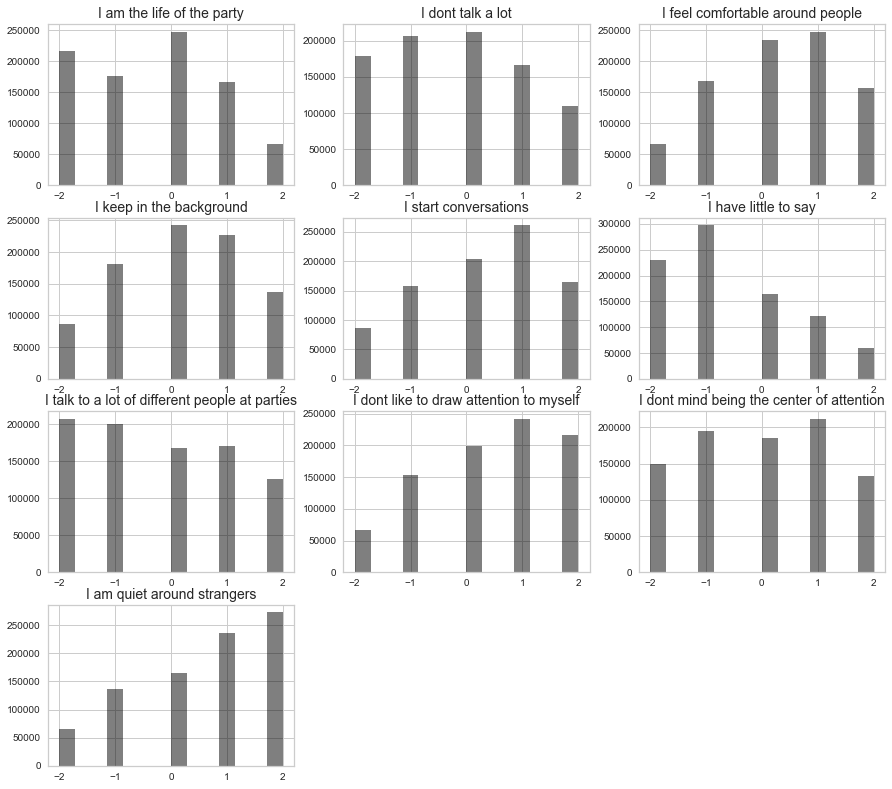

In [7]:
print('Q&As Related to Extroversion Personality')
vis_questions(EXT, ext_questions, 'black')

##### Analysis

Most respondents are generally timid, especially around strangers, with them not like to draw attention to themselves. They tend to lay low in the background and do not consider themselves the life of the party. However, they would not mind starting conversations with others and are having discussions regarding any topics under the sun. They are comfortable around other people but do not particularly like being the center of attention.

Q&As Related to Emotional Stability Personality


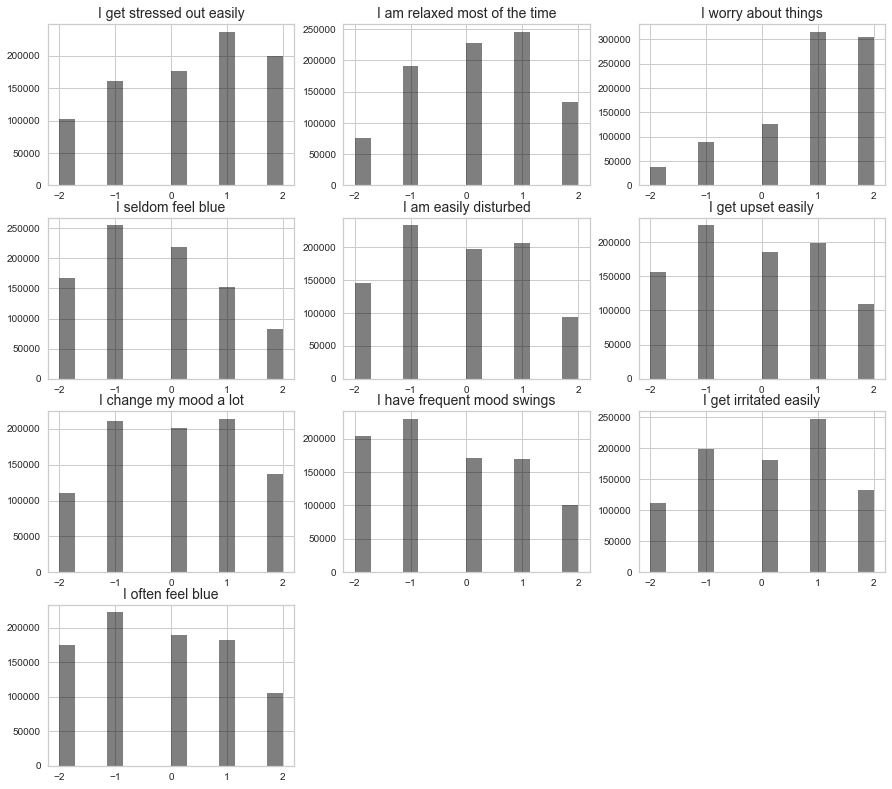

In [8]:
print('Q&As Related to Emotional Stability Personality')
vis_questions(EST, est_questions, 'black')

##### Analysis

The respondents' answers regarding Emotional Stability are very mixed. The majority answered they get irritated and stressed out easily and have very close results to the question "I change my mood a lot." The answer "slightly agree" or `1` was picked the most, followed closely by `-1` or "slightly disagree" and then `0` or "neutral" had the 3rd most votes. The majority of the respondents also answered they frequently do not have mood swings, rarely feel blue, and do not get upset easily, which is opposite to some of their answers to other questions.

Q&As Related to Agreeableness Personality


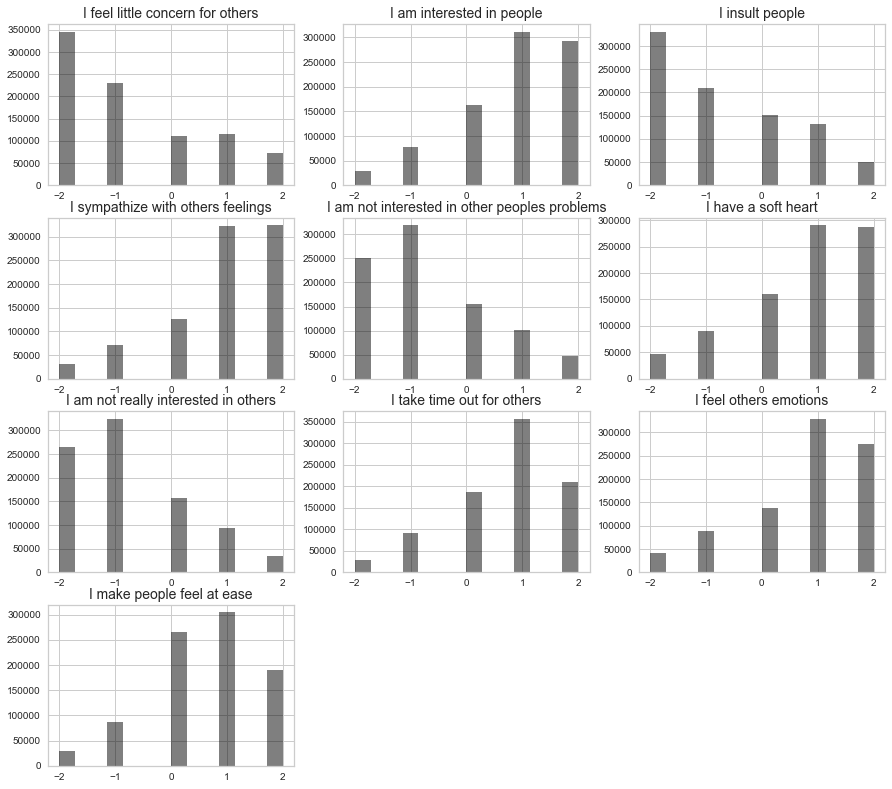

In [9]:
print('Q&As Related to Agreeableness Personality')
vis_questions(AGR, agr_questions, 'black')

##### Analysis

Looking at the graphs, a big number of respondents generally are kind and good-hearted people based on their answers, with `1` and `2` leading for the question "I have a soft" corresponding to "slightly agree" and "strongly agree" respectively. Similar results are also shown for questions "I sympathize with others' feelings" and "I am interested in people."

Q&As Related to Conscientiousness Personality


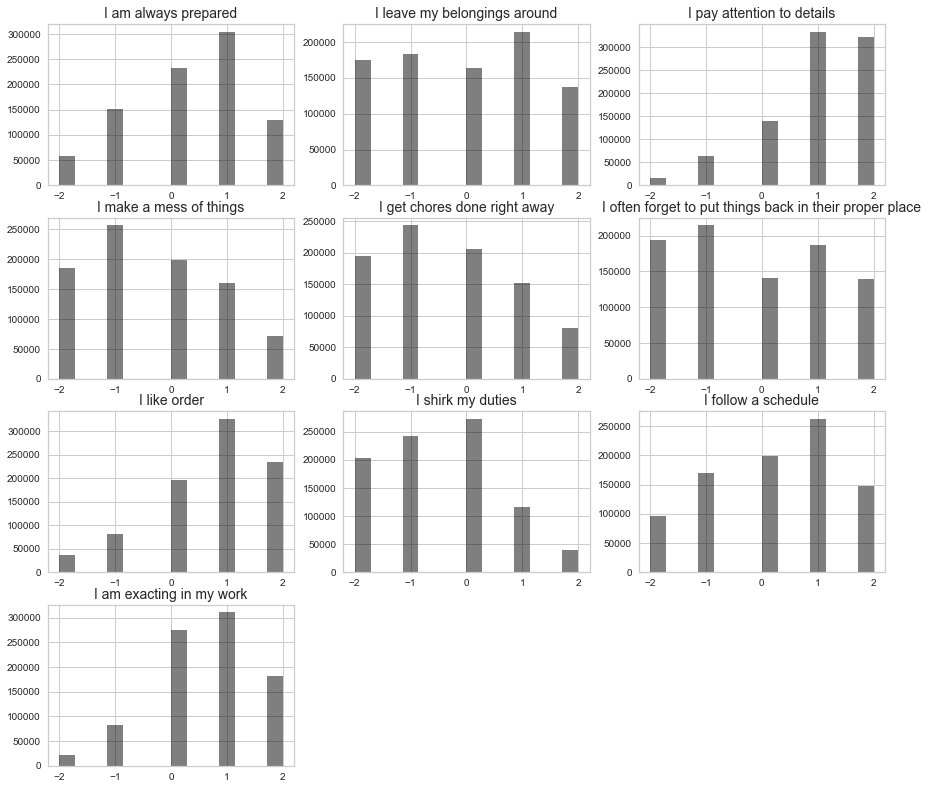

In [10]:
print('Q&As Related to Conscientiousness Personality')
vis_questions(CSN, csn_questions, 'black')

##### Analysis
For the Conscientiousness personality, the respondents are generally organized, meticulous and goal-directed people based on their answers. Questions like "I pay attention to details," "I follow a schedule," and "I am always prepared" received a high number of `1`s and `2`s, signifying the respondents slightly and strongly agree with them. However, questions such as "I often forget to put things back in their proper place" and "I leave my belongings around" received majorly `1`s and `-1`s from the respondents, which shows that these may be some of their weaknesses.

Q&As Related to Openness Personality


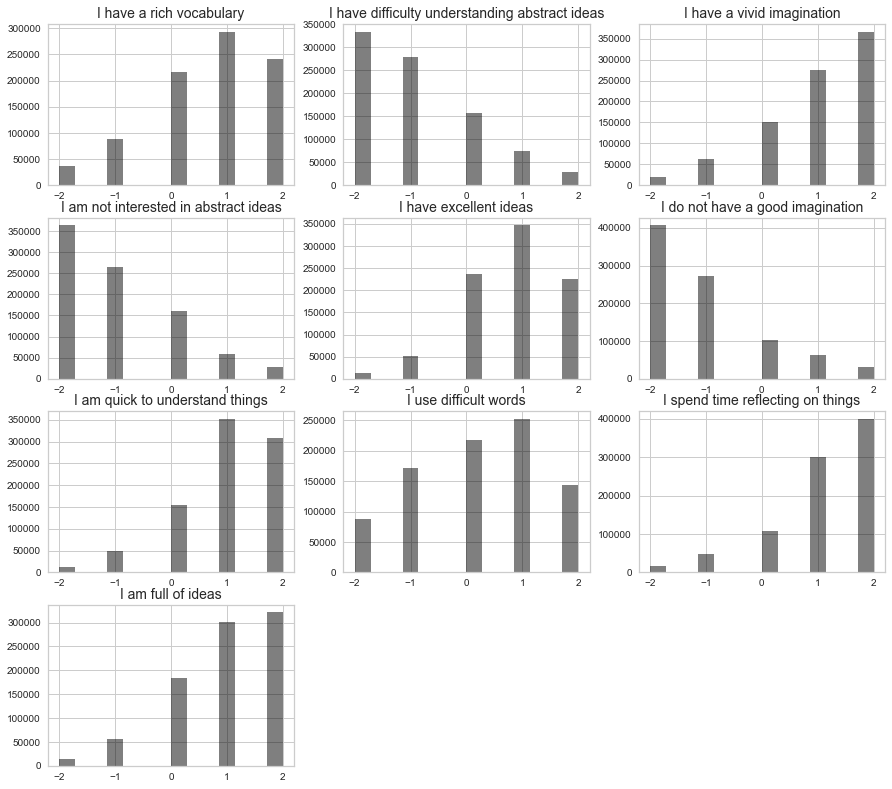

In [11]:
print('Q&As Related to Openness Personality')
vis_questions(OPN, opn_questions, 'black')

##### Analysis

Based on the graphs, the respondents seem to have high levels of openness. They are comfortable with abstract and unfamiliar ideas and look out for different experiences. They are open-minded, have an extensive vocabulary, and dedicate time to personal reflection.


# The Task

The main task is to create clusters with the given data. The main problem with these kind of dataset is that there is no exact `label` that we can use to create the clustering. There are unsupervised machine learning models that handle this situation but for this experiment, we will be using the **K-Means cluster**.


> K-means cluster is an iterative algorithm that divides an unlabeled dataset into *k* different clusters in such a way that each row in the dataset belongs only to one group that has similar properties or `features`. 

## Finding an optimum number of clusters

Before, we delve into the actual clustering. We first need to define `k` which is the number of clusters to be made. There are numerous ways to find the `optimum` number however, in this case, we will be using the `elbow` method.

### Elbow Method

`KElbowVisualizer` is used to find an optimal number  of clusters for k-means clustering using the **elbow** method. Here, we pass a range of k's to evaluate and use `KMeans` as the estimator. Once we fit this to the data we can make use of its attribute, the elbow value which is the optimum value. Here, we will only be getting `50000` sample from our original data.

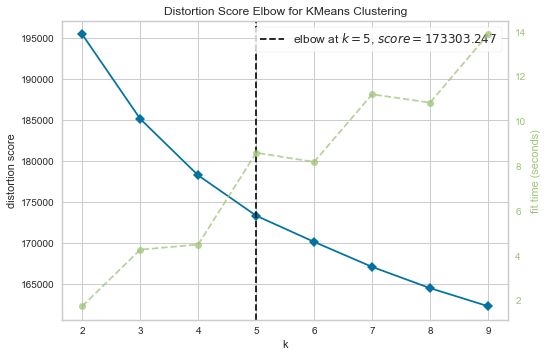

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
#df_opt = data.drop('Cluster', axis=1)
df_opt = data.sample(50000, random_state=42)
#print(df_opt.iloc[2])
columns = list(df_opt.columns)
scaler = MinMaxScaler(feature_range=(0,1))
df_opt = scaler.fit_transform(df_opt)
df_opt = pd.DataFrame(df_opt, columns=columns)
visualizer = KElbowVisualizer(estimator=KMeans(random_state=42), k=(2,10))
visualizer.fit(df_opt)
visualizer.poof()

In [14]:
visualizer.elbow_value_

5

## Training

Now, we use the obtained `elbow_value_` to train our model

In [15]:
df = data

kmeans = KMeans(n_clusters=visualizer.elbow_value_, random_state=42)
k_fit = kmeans.fit(df)
predictions = k_fit.labels_

# Create a new column of clusters to predict the data
df['Cluster'] = predictions

## Principal Component Analysis

**Prinicipal Component analysis (PCA)** is a dimensionality-reduction method used to reduce dimensionality (or features) of large datasets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set. However, dimensionality-reduction would have a minimal trade-off to the accuracy of the result. Here, we use PCA to visualize the personality clusters. To do this, we will be reducing the features from 50 (the number of questions) to 2 `n_components`. This is for us to visualize the graph in a 2D-plane.

In [16]:
pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = predictions

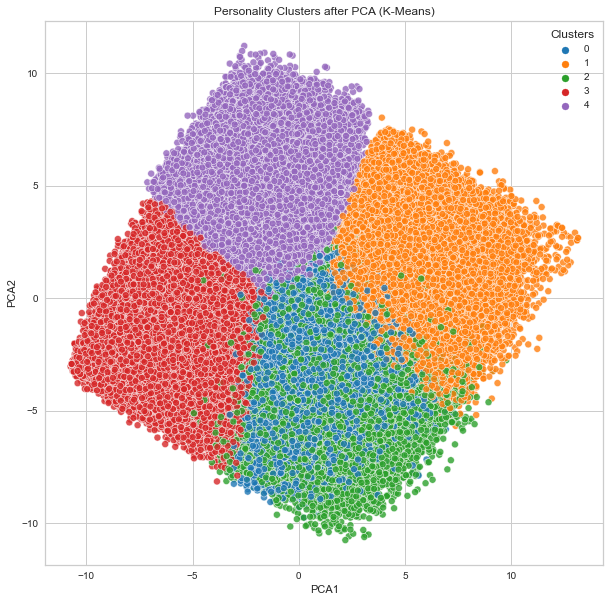

In [17]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='tab10', alpha=0.8)
plt.title('Personality Clusters after PCA (K-Means)');

## T-Distributed Stochastic Neighbor Embedding

**T-Distributed Stochastic Neighbor Embedding or TSNE** is an unsupervised, non-linear technique primarily used for data exploration and visualizing high-dimensional data. Similar to the PCA, we will be using this technique to trim down our 50 features to 2 to easily visualize it in a scatterplot. Unlike the PCA, t-SNE preserves only small pairwise distances or local similarities.

### Getting a Sample and Computing T-SNE

In [18]:
tsne_sample = df.sample(50000, random_state=42)
tsne_embedded = TSNE(n_components=2, init='random').fit_transform(tsne_sample.drop("Cluster", axis=1))
tsne_df = pd.DataFrame(data=tsne_embedded, columns=['X','y'])
tsne_df['Clusters'] = list(tsne_sample['Cluster'])

### Visualizing T-SNE

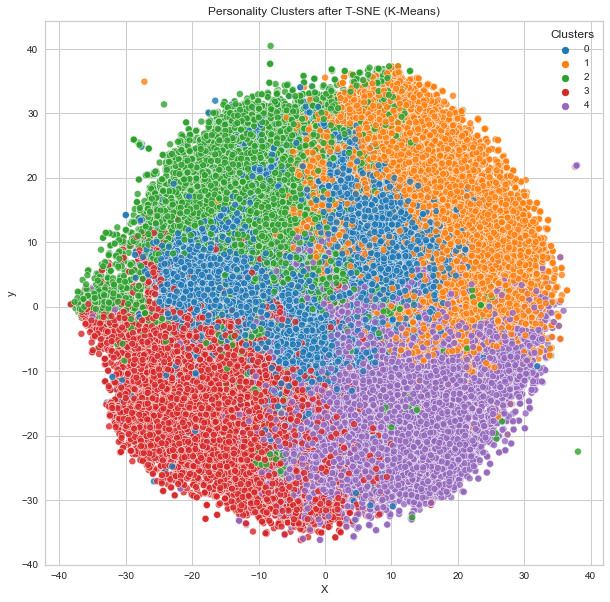

In [19]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=tsne_df, x='X', y='y', hue='Clusters', palette='tab10', alpha=0.8)
plt.title('Personality Clusters after T-SNE (K-Means)');

# Alternative Models

Other than the usual K-means cluster approach, there are also alternative methods that we can use to cluster an unlabeled dataset. However, we will not be tuning the parameters of these models since our main focus is the K-means clustering. Nonetheless, we will be visualizing how they are clustered.

## Batch K-Means

Mini-Batch K-Means uses small, random fixed-size batch of data to store in memory and with each iteration, a random sample of the data will be collected and used in updating the clusters.


In [20]:
df_mb = data.drop('Cluster', axis=1)

mbKMeans = MiniBatchKMeans(n_clusters=5, max_iter=500, verbose=1, random_state=42)
mbKMeans.fit(df_mb)

# Create a new column of clusters to predict the data
df_mb['Cluster'] = mbKMeans.labels_

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


Init 1/3 with method: k-means++
Inertia for init 1/3: 17113.070647
Init 2/3 with method: k-means++
Inertia for init 2/3: 17839.068765
Init 3/3 with method: k-means++
Inertia for init 3/3: 17253.287400
Minibatch iteration 1/4372500: mean batch inertia: 55.718058, ewa inertia: 55.718058 
Minibatch iteration 2/4372500: mean batch inertia: 58.594242, ewa inertia: 55.718716 
Minibatch iteration 3/4372500: mean batch inertia: 59.729251, ewa inertia: 55.719633 
Minibatch iteration 4/4372500: mean batch inertia: 57.813184, ewa inertia: 55.720112 
Minibatch iteration 5/4372500: mean batch inertia: 54.333447, ewa inertia: 55.719794 
Minibatch iteration 6/4372500: mean batch inertia: 54.884350, ewa inertia: 55.719603 
Minibatch iteration 7/4372500: mean batch inertia: 57.402729, ewa inertia: 55.719988 
Minibatch iteration 8/4372500: mean batch inertia: 56.459018, ewa inertia: 55.720157 
Minibatch iteration 9/4372500: mean batch inertia: 52.733117, ewa inertia: 55.719474 
Minibatch iteration 10/43

### Computing the PCA

In [22]:
pca_mb = PCA(n_components=2)
pca_mb_fit = pca_mb.fit_transform(df_mb)

df_pca_mb = pd.DataFrame(data=pca_mb_fit, columns=['PCA1', 'PCA2'])
df_pca_mb['Clusters'] = mbKMeans.labels_
# TSNE

### Visualizing the Model

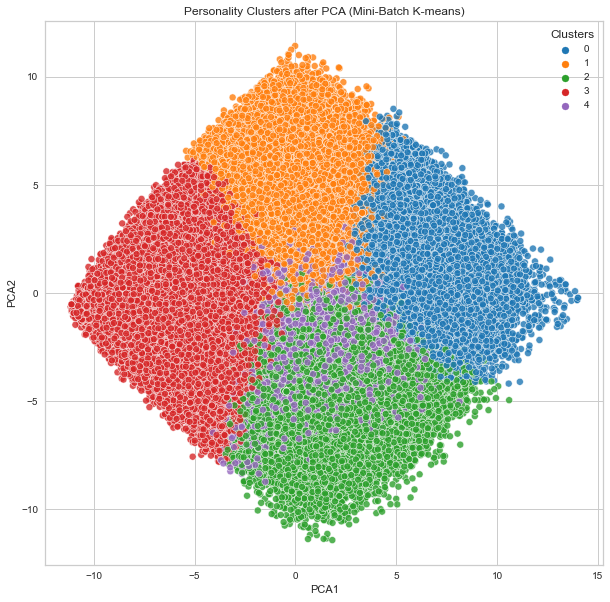

In [23]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca_mb, x='PCA1', y='PCA2', hue='Clusters', palette='tab10', alpha=0.8)
plt.title('Personality Clusters after PCA (Mini-Batch K-means)');

### Computing for the T-SNE

In [24]:
tsne_sample_mb = df_mb.sample(50000, random_state=42)
cluster_data = list(tsne_sample_mb['Cluster'])

tsne_embedded_mb = TSNE(n_components=2, init='random').fit_transform(tsne_sample_mb.drop("Cluster", axis=1))
tsne_df_mb = pd.DataFrame(data=tsne_embedded_mb, columns=['X','y'])
tsne_df_mb['Clusters'] = cluster_data

### Visualizing the Clusters T-SNE

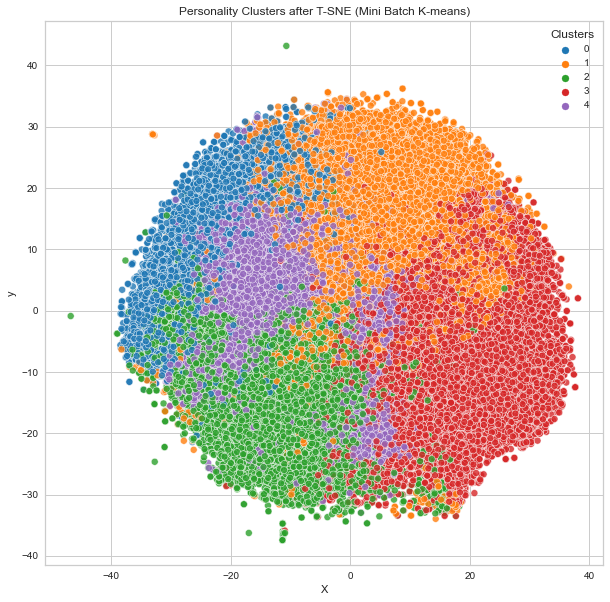

In [25]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=tsne_df_mb, x='X', y='y', hue='Clusters', palette='tab10', alpha=0.8)
plt.title('Personality Clusters after T-SNE (Mini Batch K-means)');

## Gaussian Mixture Model

A Gaussian mixture model is a probabilistic model that assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters. One can think of mixture models as generalizing k-means clustering to incorporate information about the covariance structure of the data as well as the centers of the latent Gaussians.

In [26]:
df_gmm = data.drop('Cluster', axis=1)

gmm = GaussianMixture(n_components=5, random_state=42)
gmm.fit(df_gmm)

# Create a new column of clusters to predict the data
df_gmm['Cluster'] = gmm.predict(df_gmm)

### Computing for the PCA

In [27]:
pca_gmm = PCA(n_components=2)
pca_gmm_fit = pca_mb.fit_transform(df_gmm.drop('Cluster', axis=1))
df_pca_gmm = pd.DataFrame(data=pca_gmm_fit, columns=['PCA1', 'PCA2'])
df_pca_gmm['Clusters'] = list(df_gmm['Cluster'])

### Visualizing the Clusters with PCA

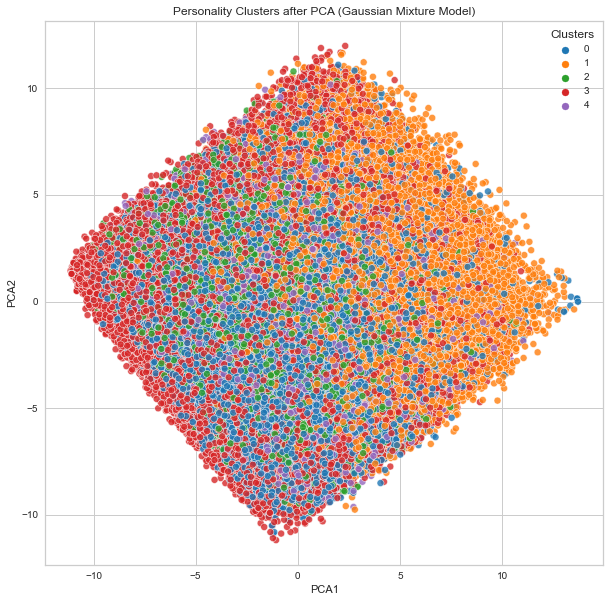

In [28]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca_gmm, x='PCA1', y='PCA2', hue='Clusters', palette='tab10', alpha=0.8)
plt.title('Personality Clusters after PCA (Gaussian Mixture Model)');

### Computing for the T-SNE

In [29]:
tsne_sample_gmm = df_gmm.sample(50000, random_state=42)
cluster_data_gmm = list(tsne_sample_gmm['Cluster'])
tsne_embedded_gmm = TSNE(n_components=2, init='random').fit_transform(tsne_sample_gmm.drop("Cluster", axis=1))
tsne_df_gmm = pd.DataFrame(data=tsne_embedded_gmm, columns=['X','y'])
tsne_df_gmm['Clusters'] = cluster_data_gmm

### Visualizing the Clusters with T-SNE

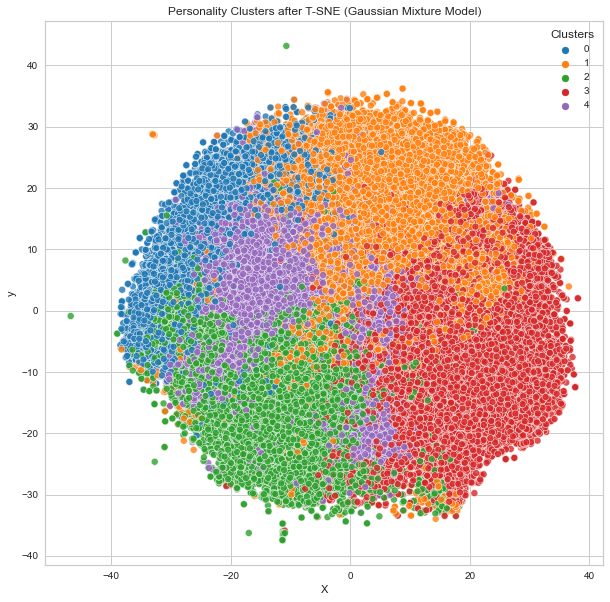

In [30]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=tsne_df_mb, x='X', y='y', hue='Clusters', palette='tab10', alpha=0.8)
plt.title('Personality Clusters after T-SNE (Gaussian Mixture Model)');

## Validating and Evaluating the Clusters for each models

Among the three models, we compute for three scores that are used to evaluate how well the clustering was done. These three are as follows:
1. **calinski-harabasz** - is defined as ratio of the sum of between-cluster dispersion and of within-cluster dispersion. A higher value would mean a better clustering. 
2. **davies_bouldin** (score) - is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are farther apart and less dispersed will result in a better score. The minimum score is zero, with lower values indicating better clustering.
3. **silhouette** - is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

### Evaluating through PCA

In [31]:
# remove column cluster
col = list(df_pca.columns)
col.remove("Clusters")
col

df_eval = pd.DataFrame(columns=["Model", "Calinski-Harabasz", "Davies_Bouldin", "Silhouette"])
print("Computing Scores in K-Means...")
df_eval.loc[len(df_eval.index)]= ["K-means", calinski_harabasz_score(df_pca[col], df_pca['Clusters']), davies_bouldin_score(df_pca[col], df_pca['Clusters']), silhouette_score(df_pca[col], df_pca['Clusters'], metric='euclidean', sample_size=100000)] 
print("Computing Scores in Mini-Batch K-means...")
df_eval.loc[len(df_eval.index)]= ["Mini-Batch K-means", calinski_harabasz_score(df_pca_mb[col], df_pca_mb['Clusters']), davies_bouldin_score(df_pca_mb[col], df_pca_mb['Clusters']), silhouette_score(df_pca_mb[col], df_pca_mb['Clusters'], metric='euclidean', sample_size=100000)] 
print("Computing Scores in Gaussian Mixture Model...")
df_eval.loc[len(df_eval.index)]= ["Gaussian Mixture Model", calinski_harabasz_score(df_pca_gmm[col], df_pca_gmm['Clusters']), davies_bouldin_score(df_pca_gmm[col], df_pca_gmm['Clusters']), silhouette_score(df_pca_gmm[col], df_pca_gmm['Clusters'], metric='euclidean', sample_size=100000)] 

Computing Scores in K-Means...
Computing Scores in Mini-Batch K-means...
Computing Scores in Gaussian Mixture Model...


KeyboardInterrupt: 

In [ ]:
df_eval

### Evaluating through T-SNE

In [ ]:
# remove column cluster
col = list(tsne_df.columns)
col.remove("Clusters")
col

tsne_df_eval = pd.DataFrame(columns=["Model", "Calinski-Harabasz", "Davies_Bouldin", "Silhouette"])
print("Computing Scores in K-Means...")
tsne_df_eval.loc[len(tsne_df_eval.index)]= ["K-means", calinski_harabasz_score(tsne_df[col], tsne_df['Clusters']), davies_bouldin_score(tsne_df[col], tsne_df['Clusters']), silhouette_score(tsne_df[col], tsne_df['Clusters'], metric='euclidean', sample_size=100000)] 
print("Computing Scores in Mini-Batch K-means...")
tsne_df_eval.loc[len(tsne_df_eval.index)]= ["Mini-Batch K-means", calinski_harabasz_score(tsne_df_mb[col], tsne_df_mb['Clusters']), davies_bouldin_score(tsne_df_mb[col], tsne_df_mb['Clusters']), silhouette_score(tsne_df_mb[col], tsne_df_mb['Clusters'], metric='euclidean', sample_size=100000)] 
print("Computing Scores in Gaussian Mixture Model...")
tsne_df_eval.loc[len(tsne_df_eval.index)]= ["Gaussian Mixture Model", calinski_harabasz_score(tsne_df_gmm[col], tsne_df_gmm['Clusters']), davies_bouldin_score(tsne_df_gmm[col], tsne_df_gmm['Clusters']), silhouette_score(tsne_df_gmm[col], tsne_df_gmm['Clusters'], metric='euclidean', sample_size=100000)] 

In [ ]:
tsne_df_eval

# Analysis

In this section, we will further analayze the obtained scores from the clustering as well as further analysis/ comparison between the Cluster and Population to see trends.

## Analyzing the Scores

Out of all the scores, the K-means clustering model had the best output in terms of...

## Analyzing the Result of K-Means

### Getting the General Mean for each Personality per Cluster

In [ ]:
col_list = list(df)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

data_sums = pd.DataFrame()
data_sums['extroversion'] = df[ext].sum(axis=1)/10
data_sums['neurotic'] = df[est].sum(axis=1)/10
data_sums['agreeable'] = df[agr].sum(axis=1)/10
data_sums['conscientious'] = df[csn].sum(axis=1)/10
data_sums['open'] = df[opn].sum(axis=1)/10
data_sums['clusters'] = predictions
data_sums.groupby('clusters').mean()

**Analysis**: Averaging each questions in the personality we could see that there is no significant difference between all of the clusters as its average of each personality play between `-0.6` to `0.6`. With this, a better approach would be getting the mean for each questions per cluster (and then visualizing it).

### Getting the mean and standard deviation for each questions per cluster

In [ ]:
df_cluster = df.groupby('Cluster').mean()
df_cluster_std = df.groupby('Cluster').std()

### Extroversion Questions

#### Cluster Mean vs Population Mean comparison

In [ ]:
EXT_df_cluster = [column for column in df_cluster if column.startswith('EXT')]
print("Extroversion Questions: Cluster Mean vs Population Mean comparison")
compare_two_graphs(EXT, ext_questions, df_cluster[EXT_df_cluster].values.transpose(), df[EXT_df_cluster].mean().transpose(), "Cluster ", "Population Mean")

##### Analysis

In general, it can be seen that most respondents in `cluster 3` and `cluster 4` are both similar when it comes to extroversion response. They lean more into the non-extroverted side as most responses on the even questions which are questions pointing towards extroversion lean more on the negative side while most responses on the odd questions which point towards introversion lean largely on the positive side. On the other hand, the other 3 clusters which are clusters `1`, `2`, and `3` have most of their respondents mostly on the pro-extroversion side with `cluster 1` being the cluster with the most positive responses with regards to extroversion behavior.

Comparing this to the mean of the population, the general trend from the results is that overall, a bit more of the respondents show traits aligning to extroversion than there are not.

#### Cluster Standard Deviation vs Population Standard Deviation comparison

In [ ]:
compare_two_graphs(EXT, ext_questions, df_cluster_std[EXT_df_cluster].values.transpose(), df[EXT_df_cluster].std().transpose(), "Cluster ", "Population STD")

##### Analysis

Looking at the standard deviation of the average responses for the population and cluster in Extroversion questions, the cluster standard deviation generally hover around `0.8` to `1.2` with the overall population standard deviation ranging from `1.2` to `1.4`. When it comes to the standard deviation between each cluster, for questions `1`, `2`, `4`, `7`, `8`, and `9` the standard deviation between each cluster is not too different with at most `.2` difference between the standard deviations. For the questions `3`, `5`, `6`, and `10`, there are noticeable differences between the standard deviations per cluster with differences of up to `0.5`. Questions `1`, `7`, and `8` should also be noted as these questions have a high dispersion of data in all clusters while Question `3` has a low dispersion of data among clusters except for `cluster 2` which has a standard deviation of above `1`. Overall, the responses in the dataset generally have a high dispersion in data.

Adding to the above, the population standard deviation is also higher than the standard deviation of each individual cluster except for `cluster 1` in question `6` which has higher standard deviation that the population for that question.

### Emotional Stability Questions

#### Cluster Mean vs Population Mean comparison

In [ ]:
EST_df_cluster = [column for column in df_cluster if column.startswith('EST')]
print("Emotional Stability Questions: Cluster Mean vs Population Mean comparison")
compare_two_graphs(EST, est_questions, df_cluster[EST_df_cluster].values.transpose(), df[EST_df_cluster].mean().transpose(), "Cluster ", "Population Mean")

##### Analysis

Unlike extroversion, the responses of the respondents in each cluster varies for each question. However it can be noted that a large majority of the respondents in all clusters answered positively when it came to `EST3` which is I am relaxed most of the time with cluster `2` having the lowest mean. In addition, cluster `1` and `3` generally have the same trend of responses aligning more into high emotional stability with negative average responses on most questions. cluster `2` and cluster `3` on the other hand generally responded positively to questions pointing to emotional instability. cluster `0` unlike the other `4` clusters has generally mixed responses on all question meaning that the average responses of the cluster to questions regarding emotional stability are generally closer neutral.

Looking at the population mean, it can be seen that most respondents generally lean more towards having emotional stability although moderately as the mean generally drifts near `0.0` in most questions.

#### Cluster Standard Deviation vs Population Standard Deviation comparison

In [ ]:
print("Emotional Stability Questions: Cluster Standard Deviation vs Population Standard Deviation comparison")
compare_two_graphs(EST, est_questions, df_cluster_std[EST_df_cluster].values.transpose(), df[EST_df_cluster].std().transpose(), "Cluster ", "Population STD")

When it comes to questions regarding emotional stability or neuroticism, there is a larger amount of dispersion between responses is most clusters with a the standard deviation often being near or above `1.0`.  Most notably questions `2`, `4`, and `5` which has all clusters' standard deviation passing `1.0` indicating that for these questions, there is a generally high variation in responses. Adding to these, complementing questions like `1`, `6`, `8`, `9`, and `10` have generally high standard deviation among clusters except for at most 1 cluster that has a standard deviation of below `0.1`. All these questions are about feelings of worry, stress, and sadness which indicates that respondents of the population regardless of clusters have very different responses for aspects regarding emotions. When it comes to positive emotions such as feeling relaxed which is covered by question `3`, this question ended up having the biggest varying standard deviation between clusters with clusters `0`, `1`, and `4` having very low average standard deviations of around `0.7` - `0.8` while clusters `2` and `3` generally have very high standard deviations of around `1.1` - `1.2`. Overall, the standard deviation when it comes to questions regarding emotional stability generally has a large amount of dispersion between data especially when it comes to negative emotions. 

In addition, the standard deviation of the overall population is higher than the standard deviation of each individual clusters in most cases with the exception of cluster `2` and `3` in question `3` and cluster `3` in question `4`

### Conscientiousness Questions

#### Cluster Mean vs Population Mean comparison

In [ ]:
CSN_df_cluster = [column for column in df_cluster if column.startswith('CSN')]
print("Conscientiousness Questions: Cluster Mean vs Population Mean comparison")
compare_two_graphs(CSN, csn_questions, df_cluster[CSN_df_cluster].values.transpose(), df[CSN_df_cluster].mean().transpose(), "Cluster ", "Population Mean")

##### Analysis

Looking at the means when it comes to questions related to conscientiousness, For all clusters, a large majority responded positively to questions `3`, `7`, and `10`. Question `3` and `7` pertains to poor item management with questions on how often the respondents forget to put items back in their place and if they leave their belongings around while question `10` is with regards to proper time management asking if the respondents follow a schedule. This indicates that a majority of the population at the very least manages their time well but are also lacking when it comes to item management. With regards to the trend between clusters, the average responses in `Cluster 1` and `Cluster 3` are similar with responses leaning more to negative. On the other hand, cluster `0`, `2`, and `3`'s responses are generally the opposite of cluster `0` and `3` except for question `4` where `cluster 2` leaned more into the negative as opposed to conscientiousness.

#### Cluster Standard Deviation vs Population Standard Deviation comparison

In [ ]:
compare_two_graphs(CSN, csn_questions, df_cluster_std[CSN_df_cluster].values.transpose(), df[CSN_df_cluster].std().transpose(), "Cluster ", "Population STD")

##### Analysis

The standard deviation of the population when it comes to questions regarding conscientiousness is generally high. With questions having noticeably high standard deviation in all clusters which are questions `2`, `4`, `5`, and `9`. Aside from these, standard deviations between clusters in other questions generally vary with some having standard deviations below 1 and some having standard deviations above 1. Unlike the questions from the previous 2 personalities, there are no large differences between the values of the standard deviation from each clusters with the biggest difference between the lowest average standard deviation and the highest average standard deviation being around `0.3`. Looking at the clusters, the standard deviation for Cluster `1`, `2`, and `4` have high dispersion in data on all questions regarding conscientiousness. This may indicate that responses in this cluster are varied and is not uniform for the cluster. Overall, the responses on questions about conscientiousness tend to have varying dispesion with some questions having consistently high deviations on all clusters and other questions having both low and high deviations on different clusters.

Comparing the Population standard deviation to the standard deviation in each individual cluster, we can see that unlike in Extroversion and emotional stability, the standard deviation of the clusters is closer to the standard deviation of the population with some being higher than the population standard deviation such as cluser `1`, `2`, and `4` in question `7`.

### Agreeableness Questions

#### Cluster Mean vs Population Mean comparison

In [ ]:
AGR_df_cluster = [column for column in df_cluster if column.startswith('AGR')]
print("Agreeableness Questions: Cluster Mean vs Population Mean comparison")
compare_two_graphs(AGR, agr_questions, df_cluster[AGR_df_cluster].values.transpose(), df[AGR_df_cluster].mean().transpose(), "Cluster", "Population Mean")

##### Analysis

When it comes to agreeableness,`4` out of the `5` clusters have very similar responses for all questions. With clusters `0`, `1`, `3`, and `4` generally having responses leaning away from agreeableness while question `2` gets varied responses with the majority being toward agreeableness. With there being only 1 cluster that is an outlier, the overall population mean for each question shows that most of the respondents are not agreeable.

#### Cluster Standard Deviation vs Population Standard Deviation comparison

In [ ]:
compare_two_graphs(AGR, agr_questions, df_cluster_std[AGR_df_cluster].values.transpose(), df[AGR_df_cluster].std().transpose(), "Cluster", "Population STD")

Similar to questions regarding Conscientiousness, `cluster 1` has high standard deviation for all questions which indicates for `cluster 1`, the responses are not very uniform or similar for the personality. On the other hand, `cluster 0` generally has low standard deviation for all questions except question `1` which is the only question whose standard deviation is consistently high for all clusters. Aside from question `1`, all other questions generally have varying standard deviations between clusters.

Looking at the standard deviation of the clusters and comparing it to the population, clusters `1` and `2` as well as `3` to a lesser degree are generally close to the standard deviation of the population and have standard deviations that are even higher than the populations in some questions. For clusters `0` and `4`, the population standard deviation is consistently higher than their individual standard deviation.

### Openness Questions

#### Cluster Mean vs Population Mean comparison

In [ ]:
OPN_df_cluster = [column for column in df_cluster if column.startswith('OPN')]
print("Openness Questions: Cluster Mean vs Population Mean comparison")
compare_two_graphs(OPN, opn_questions, df_cluster[OPN_df_cluster].values.transpose(), df[OPN_df_cluster].mean().transpose(), "Cluster", "Population Mean")

##### Analysis

All the responses in the cluster follows the same trend when it comes to questions about intellect, imagination, and openness. Most of the respondents in the clusters lean away from intellect and imagination with negative responses towards abstract ideas and understanding them as well as imagination and excellent ideas. On the other hand, the clusters lean more positively to questions about openness with a positive mean on questions regarding reflection, understanding, and ideas. The only outlier is `cluster 0` in question `8` whose responses generally leaned more towards being slow when it comes to understanding things.

#### Cluster Standard Deviation vs Population Standard Deviation comparison

In [ ]:
compare_two_graphs(OPN, opn_questions, df_cluster_std[OPN_df_cluster].values.transpose(), df[OPN_df_cluster].std().transpose(), "Cluster", "Population STD")

Looking at the standard deviation of each cluster in the questions regarding Openness, it can be seen that the standard deviation is varied between questions with some questions having consistently high standard deviations like question `1` and `7`, and some questions having relatively low standard deviations in clusters like question `7` and `9`. Unlike previous 4 personalities which have all population standard deviations consistently high with a value of above `1`, some questions have population standard deviations that are below `1` like questions `5`, `7`, `9`, and `10`. In addition, the standard deviation values between the clusters in most questions are relatively close to each other with the highest difference being `0.4`. Overall, the standard deviation between clusters when it comes to questions in openness is relatively consistent but varies when compared to the standard deviation between questions.

Comparing the Population standard deviaton to the standard deviation of each individual cluster, it can be seen that for all questions, at least one cluster has a higher standard deviation than the population.

## Summary for each Clusters

1. **Cluster 0** For cluster 0, it can be seen that the responses in the cluster lean more positively towards Extroversion. Responses in this cluster tend to be relatively negative when it comes to Agreeableness and Openness but also is the most negative when it comes to conscientiousness and emotional stability.
2. **Cluster 1** Responses on cluster 1 on the other hand are the most positively aligned towards Extroversion and relatively positive towards Conscientiousness. Responses in this cluster also has the most negative alignment towards emotional stability while being relatively negative in Agreeableness and Openness.
3. **Cluster 2** Cluster 2 meanwhile leans relatively positive towards extroversion and emotional tability. Cluster 2 is also the only cluster with responses aligning more positively towards Agreeableness. The responses in this cluster has a relatively negative alignmment towards openness and conscientiousness.
4. **Cluster 3** For cluster 3, the responses leans the most positively toward emotional stability while generally having the most negative alignment towards Agreeableness and Extroversion. Responses in the cluster also has a relatively negative alignment towards Conscientiousness and Openness.
5. **Cluster 4** The responses in cluster 4 generally align well towards emotional stability. Responses in this cluster also has the highest alignment towards Conscientiousness while having relatively negative responses to Extroversion, Agreeableness, and Openness.

# Saving the Model and Testing the Prediction

Finally, we saved our trained model and deployed to our web app: [https://predict-frontend.vercel.app/](https://predict-frontend.vercel.app/). Here, we can predict a cluster where a person belongs based on the trained model with a more friendly interface.

## Tech Stack Used
- Backend: Python (FastAPI) - Deployed to Heroku
- Frontend: React (Nextjs) - Deployed to Vercel 

In [31]:
import pickle

with open("kmeans_trained.sav", "wb") as f:
    pickle.dump(kmeans, f)